In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(10 Points)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
salary_stats = data.groupby(['MaritalDesc', 'Sex']).agg(
    min_salary=('Salary', 'min'),
    median_salary=('Salary', 'median'),
    max_salary=('Salary', 'max'),
    avg_salary=('Salary', 'mean')
)

print(salary_stats)

                 min_salary  median_salary  max_salary    avg_salary
MaritalDesc Sex                                                     
Divorced    F         45069        59393.0       68182  57345.500000
            M         45115        63738.5      148999  72520.857143
Married     F         45433        62662.0      250000  69638.986111
            M         46120        63370.5      157000  70089.038462
Separated   F         52984        60627.0       66149  60658.888889
            M         64397        70468.0       74417  69760.666667
Single      F         45395        62068.0      220450  68988.266667
            M         46428        63055.5      178000  71340.048387
Widowed     F         45046        63303.5      107226  69719.750000
            M         52788        61359.0       67176  60670.500000


2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(10 Points)

In [ ]:
top_5_termination = data['TermReason'].value_counts().head(5).reset_index()
top_5_termination.columns = ['TermReason', 'total_termination']

print(top_5_termination.to_string(index=False))

       TermReason  total_termination
N/A-StillEmployed                207
 Another position                 20
          unhappy                 14
       more money                 11
    career change                  9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(10 Points)

In [ ]:
exceeds_performance = data[data['PerformanceScore'] == 'Exceeds']
recruitment_counts = exceeds_performance.groupby('RecruitmentSource').size().reset_index(name='total_recruit')
sorted_recruitment_counts = recruitment_counts.sort_values(by='total_recruit', ascending=False)

print(sorted_recruitment_counts.to_string(index=False))

 RecruitmentSource  total_recruit
            Indeed             12
          LinkedIn              9
Diversity Job Fair              6
 Employee Referral              5
     CareerBuilder              2
     Google Search              2
           Website              1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(10 Points)

In [ ]:
#code here
hasil = data.groupby('Department')['ManagerName'].nunique()
hasil.columns = ['Department', 'ManagerCount']

print(hasil)

Department
Admin Offices            3
Executive Office         1
IT/IS                    6
Production              10
Sales                    4
Software Engineering     3
Name: ManagerName, dtype: int64


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(10 Points)

In [ ]:
#code here
hasil = data.groupby('Sex')['Termd'].value_counts(normalize=True)

print(hasil)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: proportion, dtype: float64


# Create an EDA and Data Visualization Question

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


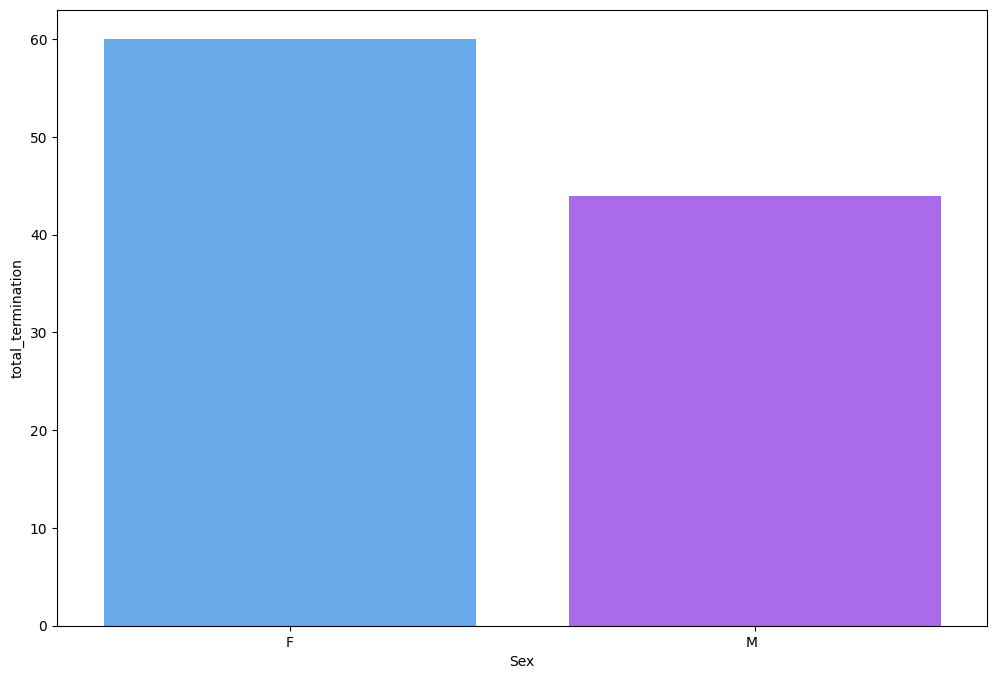

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

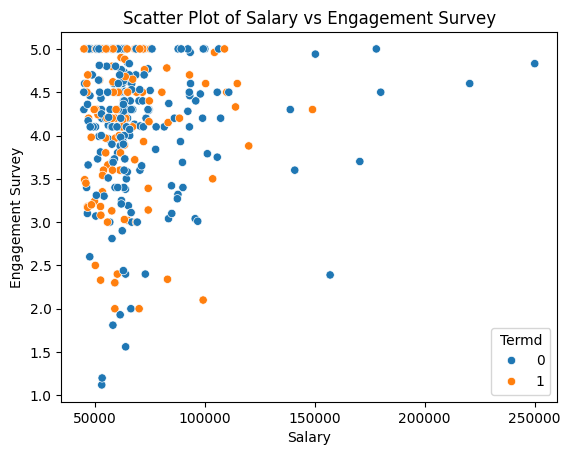

In [ ]:
#code here
sns.scatterplot(x='Salary', y='EngagementSurvey', hue='Termd', data=data)

plt.title('Scatter Plot of Salary vs Engagement Survey')
plt.xlabel('Salary')
plt.ylabel('Engagement Survey')
plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

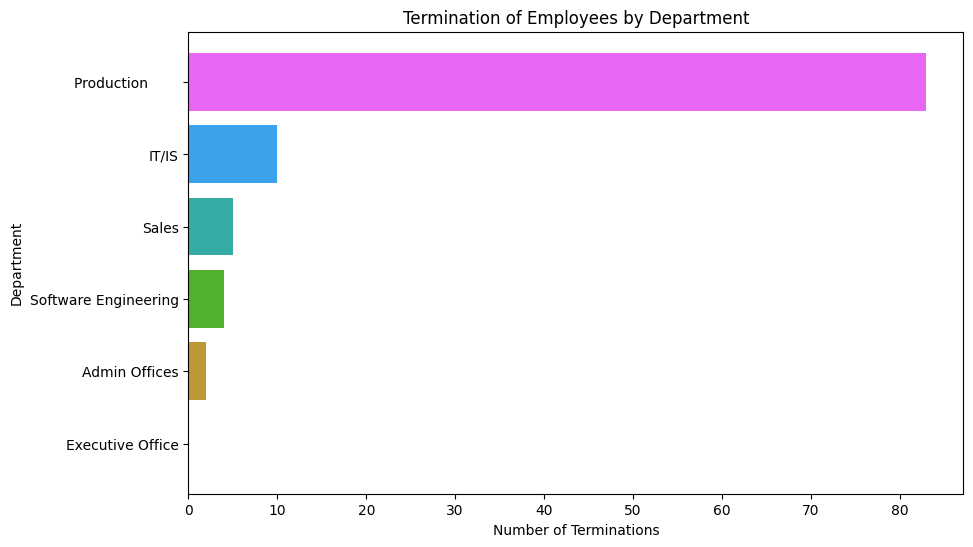

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

termination_by_department = data[data['Termd'] == 1].groupby('Department')['Termd'].count().reset_index()

# Cek apakah "Executive Office" sudah ada di data
if 'Executive Office' not in termination_by_department['Department'].values:
  # Tambahkan data kosong untuk "Executive Office"
  new_row = pd.DataFrame({'Department': ['Executive Office'], 'Termd': [0]})
  termination_by_department = pd.concat([termination_by_department, new_row], ignore_index=True)

plt.figure(figsize=(10, 6))
colors = sns.color_palette('husl', len(termination_by_department))

termination_by_department = termination_by_department.sort_values(by=['Termd'], ascending=True)

plt.barh(termination_by_department['Department'], termination_by_department['Termd'].tolist(), color=colors)
plt.xlabel("Number of Terminations")
plt.ylabel("Department")
plt.title("Termination of Employees by Department")
plt.show()



8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

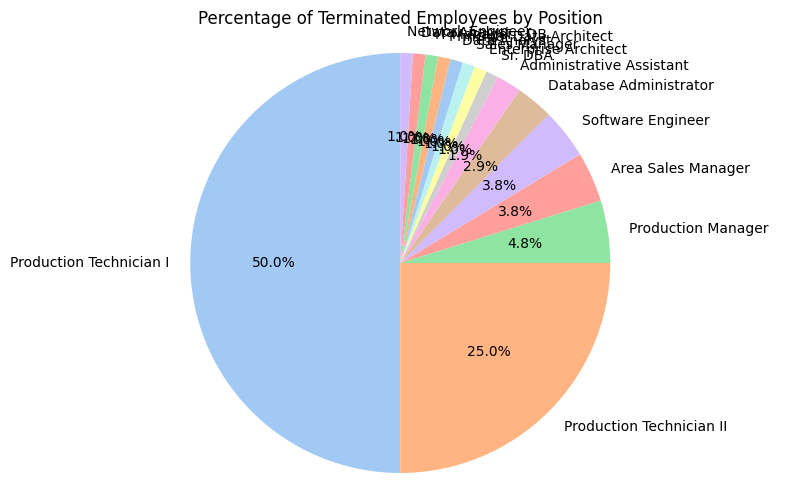

In [ ]:
terminated_employees = data[data['Termd'] == 1]

position_counts = terminated_employees['Position'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel', len(position_counts)))
plt.title('Percentage of Terminated Employees by Position')
plt.axis('equal')
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

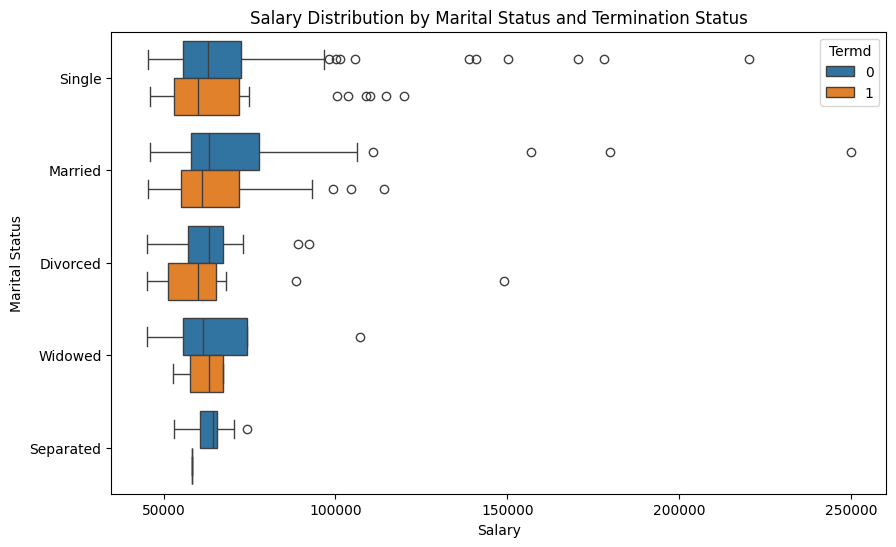

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Salary', y='MaritalDesc', hue='Termd', data=data, orient='h')
plt.title('Salary Distribution by Marital Status and Termination Status')
plt.xlabel('Salary')
plt.ylabel('Marital Status')
plt.show()


10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(10 points)

In [ ]:
#codde here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url= "https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv"
df= pd.read_csv(url)

sns.pairplot(df[['Salary','EngagementSurvey', 'EmpSatisfaction','Absences','Termd']], hue='Termd')

plt.suptitle('Pairplot of Salary, EngagementSurvey, EmpSatisfaction,Absences, by Termination Status', y=1.02)

plt.show()

# Insight (Answering the Question)

11.	Is there any relationship between who a person works for (their manager) and their performance score? (10 points)<br>
12.	What are our best recruiting sources if we want to ensure a low ratio of termination? (10 points)<br>

11. Is there any relationship between who a person works for (their manager) and their performance score (10)


In [ ]:
import pandas as pd

url= "https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv"
df= pd.read_csv(url)

performance_mapping ={
  "Exceeds":5,
  "Fully Meets": 4,
  "Needs Improvement":3,
  "PIP": 2
}

df['PerformanceScore_Numeric'] =df['PerformanceScore'].map(performance_mapping)
avg_performance_by_manager = df.groupby('ManagerName')['PerformanceScore_Numeric'].mean()
avg_performance_df = avg_performance_by_manager.reset_index()
avg_performance_df.columns=['ManagerName', 'AveragePerformanceScore']
top_5_managers = avg_performance_df.nlargest(5,'AveragePerformanceScore')

print(top_5_managers)



        ManagerName  AveragePerformanceScore
9      Eric Dougall                 4.250000
11  Jennifer Zamora                 4.142857
19       Simon Roup                 4.117647
0   Alex Sweetwater                 4.111111
10       Janet King                 4.105263


12.
What are our best recruiting sources if we want to ensure a low ratio of termination? (10 points)


In [ ]:
import pandas as pd
url= "https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv"
df= pd.read_csv(url)

termination_counts = df.groupby('RecruitmentSource')['Termd'].value_counts().unstack(fill_value=0)
termination_counts['Termination_Ratio']= termination_counts[1]/(termination_counts[0]+ termination_counts[1])
print(termination_counts[['Termination_Ratio']])

Termd                    Termination_Ratio
RecruitmentSource                         
CareerBuilder                     0.478261
Diversity Job Fair                0.551724
Employee Referral                 0.161290
Google Search                     0.612245
Indeed                            0.241379
LinkedIn                          0.236842
On-line Web application           1.000000
Other                             0.500000
Website                           0.076923
